<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Libraries-and-functions" data-toc-modified-id="Libraries-and-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries and functions</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Local-libraries" data-toc-modified-id="Local-libraries-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Local libraries</a></span></li></ul></li><li><span><a href="#Options" data-toc-modified-id="Options-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Options</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load data</a></span><ul class="toc-item"><li><span><a href="#Features" data-toc-modified-id="Features-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Features</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Collect-features-for-backtesting" data-toc-modified-id="Collect-features-for-backtesting-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Collect features for backtesting</a></span></li><li><span><a href="#Compute-Market-cap-weighted-returns" data-toc-modified-id="Compute-Market-cap-weighted-returns-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Compute Market cap weighted returns</a></span></li><li><span><a href="#Compute-equal-weighted-returns" data-toc-modified-id="Compute-equal-weighted-returns-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Compute equal weighted returns</a></span></li><li><span><a href="#Include-market-cap-inverse-as-size-factor" data-toc-modified-id="Include-market-cap-inverse-as-size-factor-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Include market cap inverse as size factor</a></span></li><li><span><a href="#Define-your-own-factors-here" data-toc-modified-id="Define-your-own-factors-here-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Define your own factors here</a></span></li><li><span><a href="#Restrict-data" data-toc-modified-id="Restrict-data-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Restrict data</a></span></li><li><span><a href="#Do-median-imputation-(optional)" data-toc-modified-id="Do-median-imputation-(optional)-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Do median imputation (optional)</a></span></li></ul></li><li><span><a href="#Compute-backtesting-metrics" data-toc-modified-id="Compute-backtesting-metrics-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compute backtesting metrics</a></span><ul class="toc-item"><li><span><a href="#Prepare-detailed-and-aggregated-versions-of-backtesting-results" data-toc-modified-id="Prepare-detailed-and-aggregated-versions-of-backtesting-results-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Prepare detailed and aggregated versions of backtesting results</a></span></li></ul></li><li><span><a href="#Generate-plots" data-toc-modified-id="Generate-plots-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Generate plots</a></span><ul class="toc-item"><li><span><a href="#Horizontal-box-plots" data-toc-modified-id="Horizontal-box-plots-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Horizontal box plots</a></span></li><li><span><a href="#Line-Box-plot-combination-for-a-single-feature" data-toc-modified-id="Line-Box-plot-combination-for-a-single-feature-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Line-Box plot combination for a single feature</a></span></li></ul></li></ul></div>

# Overview


In this notebook compute metrics for factors


**Backtesting function usage notes:**

* The input to the backtesting function is in the form of a long dataframe as illustrated below:


| Date  	|Equity Parent   	|returns   	|feature_1   	|
|------	|------	|------	|------	|
|2010-01-01   	|FORD MOTOR CO   	|value_1   	|value_1   	|
|2010-02-01   	|FORD MOTOR CO   	|value_2   	|value_2   	|
|2010-03-01   	|FORD MOTOR CO   	|value_3   	|value_3   	|

* This procedure does not handle subsetting for a specified date range
    * Subsetting to a specified date range needs to be done prior to passing the input dataframe.
    * This can be accomplished by specifying start_date and end_date in the options section of the notebook.


* The procedure works on the assumption that the bin_labels are specified in descending order
   * eg: ['Q1','Q2','Q3','Q4'] implies Q1 is the highest portfolio and Q4 is the lowest


* The generation of bins work ideally with a sufficient number of unique values in a feature. Too few unique values, could break the procedure, or return spurious results. The appropriate number of unique values, would depend on n_bins.
    * Use this 
    
    ```df_unique_check = df_feature_detail.groupby(date_col_name)[feature_col_name].nunique()``` 
    
    to check for unique values in a feature


# Libraries and functions

## Import libraries

In [1]:
# libraries

# general
import sys
import os


import datetime
import numpy as np
import pandas as pd

# plotting
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# # statistics and machine learning

from IPython.display import display
pd.options.display.max_columns = None

# # add the base path to python system path
path = os.getcwd()
#dir_up = os.path.abspath(os.path.join(path, os.pardir))
base_path = os.path.abspath(os.path.join(path, os.pardir))
sys.path.append(base_path)


# from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
from matplotlib import gridspec


# # libraries within package
from src.finance_functions import multiple_returns_from_levels_vec, project_to_first
from src.finance_functions import df_restrict_dates
from src.modelling import df_fill_missing
from src.automotive_dictionaries import equity_name2first_date
from src.feature_backtesting_routines import get_detail_backtest_results, perform_aggregation_across_time

%load_ext autoreload
%autoreload 2

## Local libraries

In [2]:
def box_plot(detail_results_df,features=None,figsize=(5,9),rot=90):

    if features is None:
        
        features = detail_results_df['feature'].unique().tolist()
    
    else:
        
        box_df = detail_results_df.copy()
        box_df = box_df[box_df['feature'].isin(features)]
        box_df = box_df[['spread','feature']]
        mean = round(box_df['spread'].mean(),2)
        box_df = box_df.pivot(columns='feature',values='spread')
        ax = box_df.boxplot(figsize=figsize,rot=rot,showmeans=True,showfliers=True)
        return (ax,mean) 

def box_plot_all(detail_results_df, features=None, figsize=(5,9), alignment='H'):
    
    if features is None:
        
        features = detail_results_df['feature'].unique().tolist()
    
    else:
        
        n = len(features)
        box_df = detail_results_df.copy()
        box_df = box_df[box_df['feature'].isin(features)]
        box_df = box_df[['spread','feature']]
        box_df = box_df.pivot(columns='feature',values='spread')
        box_df = box_df[feature_list]

        if alignment == 'V':
            fig, ax = plt.subplots(figsize=figsize)
            plot_list = [box_df.iloc[:,k].values for k in range(n)]
            ax.boxplot(plot_list, showmeans=True, labels=list(box_df.columns[:n]), vert=True)
            plt.setp( ax.xaxis.get_majorticklabels(), rotation=45, horizontalalignment='right' )
            plt.show()  

        else:
            fig, ax = plt.subplots(figsize=figsize)
            plot_list = [box_df.iloc[:,k].values for k in range(n)][::-1]
            ax.boxplot(plot_list, showmeans=True, labels=list(box_df.columns[:n])[::-1], vert=False)
            plt.show()  
    
    return plt

def time_series_plot(detail_results_df,feature=None,figsize=(15,9),fontsize=16):
    
    if feature is not None:
        line_df = detail_results_df.copy()
        line_df = line_df[line_df['feature'] == feature]['spread'].copy()
        ax = line_df.plot(figsize=figsize,fontsize=fontsize,grid = True)
        ax.axhline(y=line_df.mean(), xmin=-1, xmax=1, color='b', linestyle='-', lw=2) # mean line
        ax.set_ylabel('Quintile portfolio spread [%]',fontsize=fontsize)
        
        return ax
        
def time_series_box_plot_combination(detail_results_df,
                                     feature=None,
                                     figsize=(15,9),
                                     width_ratios=[4,1],
                                     x_axis_visible = False):
    
    feature_var = feature

    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(1, 2, width_ratios=width_ratios) 

    ax0 = plt.subplot(gs[0])
    ax0 = time_series_plot(backtesting_detail_results,feature= feature_var)

    ax1 = plt.subplot(gs[1])
    tup = box_plot(backtesting_detail_results,features=[feature_var], rot = 0)
    
    ax1 = tup[0]
    mean = tup[1]
    
    ax1.annotate(mean,xy=(1,1), xycoords='data',xytext=(1.1,mean), textcoords='data')
    
    x_axis = ax1.axes.get_xaxis()
    x_axis.set_visible(x_axis_visible)

    fig.suptitle(feature_var)
    
    return plt.gca()

# Options

In [3]:
equity_data_from_update = True

# Correlation type to use
#corr_type = 'spearman'

do_median_imputation = False

include_size_factor = True

# dates for backtesting period
start_date = datetime.datetime(2010, 5, 1)
end_date = datetime.datetime(2016, 4, 1)

# Load data

## Features

In [4]:
filename = '../data/data_sample_monthly.csv'
infile = filename
df_comb_long = pd.read_csv(infile)
df_comb_long['date'] = pd.to_datetime(df_comb_long['date'])

In [5]:
df_comb_long.head()

,date,company,stock_price,returns,index_name,index_levels,index_returns,MarketCap_Mlns,Revenues,NetIncome,COGS,volume
0,2008-01-01,BAYER MOTOREN WERK,54.486230,-0.132633,dax,6851.750000,NaN,32800.448938,NaN,NaN,NaN,384038.0
1,2008-02-01,BAYER MOTOREN WERK,54.925536,0.008063,dax,6748.129883,-0.015123,33064.908976,2.281679e+10,1.445970e+09,1.888679e+10,375563.0
2,2008-03-01,BAYER MOTOREN WERK,55.443756,0.009435,dax,6534.970215,-0.031588,33376.874785,NaN,NaN,NaN,359823.0
3,2008-04-01,BAYER MOTOREN WERK,54.880897,-0.010152,dax,6948.819824,0.063328,33038.036212,2.105088e+10,7.685116e+08,1.368109e+10,341071.0
4,2008-05-01,BAYER MOTOREN WERK,59.162678,0.078020,dax,7096.790039,0.021294,35615.647902,NaN,NaN,NaN,355610.0


In [6]:
# long to wide
#eq_name = 'Equity Parent'
eq_name = 'company'
df_prices = df_comb_long.pivot(values='stock_price', index='date', columns=eq_name)

# monthly returns
df_returns = multiple_returns_from_levels_vec(df_prices.ffill())

In [7]:
# wide to long (melt)
# df_returns_long = pd.melt(df_returns.reset_index(), id_vars=['date'], var_name=eq_name, 
#                           value_name='returns')

In [8]:
# df_returns_long.head()

In [9]:
# how_join = 'outer'
# #how_join = 'inner'
# how_join = 'left'
# left_on = ['date', eq_name]
# right_on = ['date', eq_name]

# df_comb_long = df_comb_long.merge(df_returns_long, how=how_join, left_on=left_on , right_on=right_on)

# Preprocessing

## Collect features for backtesting

In [10]:
l_features = ['volume']

## Compute Market cap weighted returns

In [11]:
df_market_cap = df_comb_long.pivot(values='MarketCap_Mlns', index='date', columns=eq_name)
df_market_cap.index = df_market_cap.index.map(project_to_first)

# deal with the missing values by taking the previously available one
df_market_cap.ffill(inplace=True)

# set to zero when not available, this takes care of the market cap weights
for col in df_market_cap.columns:
    first_date = project_to_first(equity_name2first_date[col])
    mask = df_market_cap.index < first_date
    df_market_cap.loc[mask, col] = 0.0

In [12]:
total_market_cap = df_market_cap.sum(axis=1)
# weights determined in the same month as market cap
df_weights = df_market_cap.div(total_market_cap, axis=0)

In [13]:
# the weights for the index should be determined by past information,
# i.e.by previous month market_cap
df_weights_mc = df_weights.shift(1)

In [14]:
df_mc_index_returns = pd.DataFrame((df_returns * df_weights_mc).sum(axis=1), columns=['mc_return'])
df_mc_index_returns.dropna(inplace=True)

In [15]:
#df_mc_index_returns.head()

## Compute equal weighted returns

In [16]:
df_temp = (df_weights_mc > 0.0).astype(int)
df_weights_equal = df_temp.div(df_temp.sum(axis=1), axis=0)

In [17]:
df_equal_index_returns = pd.DataFrame((df_returns * df_weights_equal).sum(axis=1), 
                                      columns=['equal_return'])
df_equal_index_returns.rename(columns={'equal_return': 'Qe'}, inplace=True)

In [18]:
#df_equal_index_returns.head()

## Include market cap inverse as size factor

In [19]:
if include_size_factor:
    df_comb_long['size_factor'] = 1/df_comb_long['MarketCap_Mlns']
    l_features.append('size_factor')  # include separately.

## Define your own factors here

## Restrict data

In [20]:
df_restricted = df_comb_long.copy()
df_restricted.set_index('date', inplace=True) 

df_restricted = df_restrict_dates(df_restricted, start_date, end_date)

## Do median imputation (optional)

If no NaNs are present, median imputation is not required

In [21]:
# there are nans from size factor
test0 = df_restricted[l_features]
print(str(np.sum(np.sum(np.isnan(test0))))+' nans', str(np.sum(np.sum(test0 == 0)))+' zeros',
      str(np.sum(np.sum(test0 == np.inf)))+' infinities')

7 nans 0 zeros 0 infinities


In [22]:
#hf.show_nans(df_restricted[l_features].reset_index())


In [23]:
if do_median_imputation:
    df_restricted[l_features] = df_fill_missing(df_restricted[l_features], missing_val_strategy='median')

# Compute backtesting metrics

##### Backtesting function usage notes:

* The input to the backtesting function is in the form of a long dataframe as illustrated below:


| Date  	|Equity Parent   	|returns   	|feature_1   	|
|------	|------	|------	|------	|
|2010-01-01   	|FORD MOTOR CO   	|value_1   	|value_1   	|
|2010-02-01   	|FORD MOTOR CO   	|value_2   	|value_2   	|
|2010-03-01   	|FORD MOTOR CO   	|value_3   	|value_3   	|

* This procedure does not handle subsetting for a specified date range
    * Subsetting to a specified date range needs to be done prior to passing the input dataframe.
    * This can be accomplished by specifying start_date and end_date in the options section of the notebook.


* The procedure works on the assumption that the bin_labels are specified in descending order
   * eg: ['Q1','Q2','Q3','Q4'] implies Q1 is the highest portfolio and Q4 is the lowest


* The generation of bins work ideally with a sufficient number of unique values in a feature. Too few unique values, could break the procedure, or return spurious results. The appropriate number of unique values, would depend on n_bins.
    * Use this df_unique_check = df_feature_detail.groupby(date_col_name)[feature_col_name].nunique() to check for unique values in a feature

In [24]:
l_features
#df_restricted.head()

['volume', 'size_factor']

In [25]:
n_quantiles = 5
backtesting_results = get_detail_backtest_results(df_restricted, l_features, equity_identifier=eq_name, 
                                                  n_bins=n_quantiles)

Total features for processing: 2


In [26]:
backtesting_results.head()

,Q1_avg,Q1_std,Q2_avg,Q2_std,Q3_avg,Q3_std,Q4_avg,Q4_std,Q5_avg,Q5_std,spread,ic_cs,feature,category
date,,,,,,,,,,,,,,
2010-05-01,-0.155975,0.068885,-0.063418,0.112964,-0.129712,0.060137,-0.060238,0.037077,-0.093029,0.024364,-6.294551,-0.406593,size_factor,size_factor
2010-06-01,-0.114397,0.009191,0.035887,0.037432,-0.008131,0.037775,-0.040897,0.097178,-0.006660,0.038620,-10.773651,0.000000,size_factor,size_factor
2010-07-01,-0.010715,0.197012,0.086300,0.064306,0.103146,0.125939,0.137765,0.114235,0.038163,0.038172,-4.887753,-0.169231,size_factor,size_factor
2010-08-01,-0.102828,0.072062,-0.050337,0.053371,0.019228,0.139041,-0.075966,0.052899,0.013224,0.064317,-11.605195,-0.279121,size_factor,size_factor
2010-09-01,0.318249,0.241834,0.146585,0.127290,0.260534,0.052707,0.160830,0.143331,0.177311,0.174887,14.093844,0.107692,size_factor,size_factor


## Prepare detailed and aggregated versions of backtesting results

In [27]:
# include market cap weighted returns in results dataframe
backtesting_results_mc = backtesting_results.merge(df_mc_index_returns, left_index=True, 
                                                   right_index=True)

# include equal weighted returns in results dataframe
backtesting_detail_results = backtesting_results_mc.merge(df_equal_index_returns, left_index=True, 
                                                          right_index=True)

# take the month-by-month detail results, and output aggregate results over the date range
df_agg_results = perform_aggregation_across_time(backtesting_detail_results)
df_agg_results.reset_index(inplace=True)

# include spearman correlations in results dataframe
final_results = df_agg_results

In [28]:
final_results

,feature,category,Q1_avg,Q1_std,Q2_avg,Q2_std,Q3_avg,Q3_std,Q4_avg,Q4_std,Q5_avg,Q5_std,spread_avg,spread_std,ic_cs_avg,ic_cs_std,Qe_avg,Qe_std,mc_return_avg,mc_return_std
0,size_factor,size_factor,0.010872,0.109252,0.014521,0.085792,0.016501,0.085123,0.007373,0.049138,0.010230,0.046490,0.064141,9.782189,-0.059628,0.285305,0.012045,0.073977,0.007316,0.059821
1,volume,volume,0.009133,0.054224,0.003294,0.066181,0.015844,0.070949,0.007275,0.074765,0.023763,0.116415,-1.462989,10.082045,0.013296,0.275892,0.012045,0.073977,0.007316,0.059821


In [29]:
feature_list = l_features

# Generate plots

## Horizontal box plots

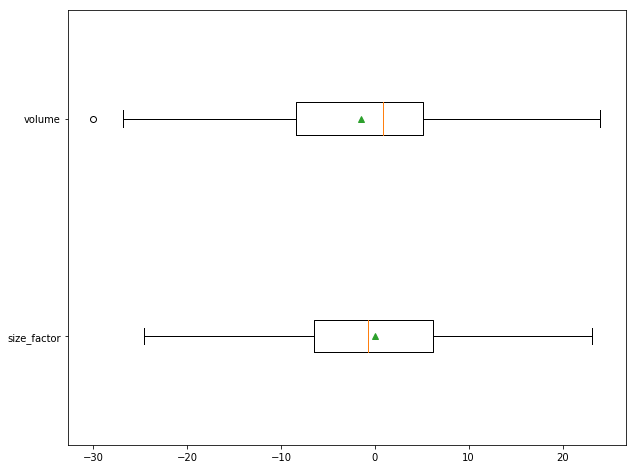

In [30]:
box_df = box_plot_all(backtesting_detail_results, features=feature_list, figsize=(10,8), alignment='H')

## Line-Box plot combination for a single feature

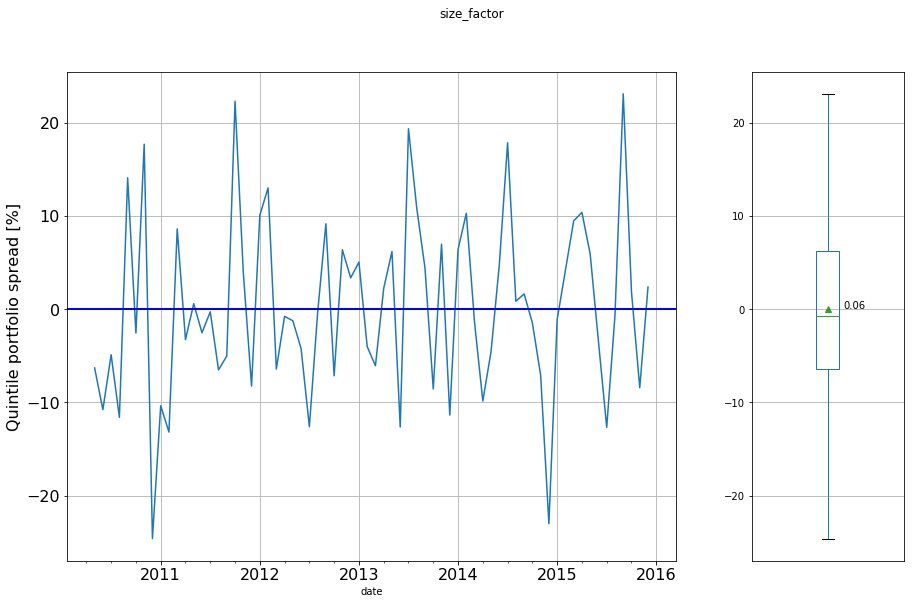

In [31]:
plt_1 = time_series_box_plot_combination(backtesting_detail_results,
                                         feature=feature_list[1])